In [24]:
import pandas as pd
from pandas_datareader import data,wb
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [27]:
# #Data, get some data from internet so using pandas datareader
# #stock info
# #Bank Of America: BAC
# start=pd.to_datetime('2006-01-01')
# end=pd.to_datetime('2016-01-01')
# data.DataReader("AMZN",'yahoo',start,end)

start_date='2006-01-01'
end_date='2022-12-31'

tickers=['BAC','C','JPM','WFC','GS']
df=yf.download(tickers,start_date,end_date)
df.tail()

[*********************100%***********************]  5 of 5 completed


Adj Close                                     \
                                 BAC          C          GS         JPM   
Date                                                                      
2022-12-23 00:00:00-05:00  32.470001  44.259998  345.510010  130.317398   
2022-12-27 00:00:00-05:00  32.529999  44.389999  341.970001  130.774033   
2022-12-28 00:00:00-05:00  32.770000  44.619999  340.869995  131.488754   
2022-12-29 00:00:00-05:00  33.139999  45.160000  343.429993  132.243179   
2022-12-30 00:00:00-05:00  33.119999  45.230000  343.380005  133.116730   

                                          Close                         \
                                 WFC        BAC          C          GS   
Date                                                                     
2022-12-23 00:00:00-05:00  40.980000  32.470001  44.259998  345.510010   
2022-12-27 00:00:00-05:00  41.040001  32.529999  44.389999  341.970001   
2022-12-28 00:00:00-05:00  41.119999  32.770000  44.619999  340.869995   
2022-12-29 00:00:00-05:00  41.330002  33.139999  45.160000  343.429993   
2022-12-30 00:00:00-05:00  41.290001  33.119999  45.230000  343.380005   

                                                  ...       Open             \
                                  JPM        WFC  ...        BAC          C   
Date                                              ...                         
2022-12-23 00:00:00-05:00  131.279999  40.980000  ...  32.400002  44.000000   
2022-12-27 00:00:00-05:00  131.740005  41.040001  ...  32.500000  44.279999   
2022-12-28 00:00:00-05:00  132.460007  41.119999  ...  32.570000  44.430000   
2022-12-29 00:00:00-05:00  133.220001  41.330002  ...  32.889999  44.840000   
2022-12-30 00:00:00-05:00  134.100006  41.290001  ...  33.099998  44.930000   

                                                                Volume  \
                                   GS         JPM        WFC       BAC   
Date                                                                     
2022-12-23 00:00:00-05:00  344.839996  130.580002  40.689999  21378600   
2022-12-27 00:00:00-05:00  346.510010  131.570007  41.009998  22776100   
2022-12-28 00:00:00-05:00  340.500000  131.850006  40.939999  30541000   
2022-12-29 00:00:00-05:00  342.440002  132.929993  41.150002  22252900   
2022-12-30 00:00:00-05:00  341.739990  132.809998  41.110001  28191300   

                                                                 
                                  C       GS      JPM       WFC  
Date                                                             
2022-12-23 00:00:00-05:00  15143800  1062000  5091900  10167500  
2022-12-27 00:00:00-05:00  14777800  1035000  5411000  10297400  
2022-12-28 00:00:00-05:00  12882200  1117200  8827700  11889400  
2022-12-29 00:00:00-05:00  14124100  1273600  6585200  11597100  
2022-12-30 00:00:00-05:00  11778600  1031400  9290300  10019400  

[5 rows x 30 columns]

In [ ]:
BAC= yf.download('BAC',start_date,end_date)
C=yf.download("C",start_date,end_date)
GS=yf.download("GS",start_date,end_date)
JPM=yf.download("JPM",start_date,end_date)
WFC=yf.download("WFC",start_date,end_date)

In [ ]:
bank_stocks=pd.concat([BAC,C,JPM,WFC,GS],axis=1,keys=tickers)

In [ ]:
bank_stocks.columns.names=['Bank Tickers','Stock Info']
bank_stocks

In [34]:
#max close price for each bank stock
bank_stocks.xs('Close',level='Stock Info',axis=1).max()

Bank Tickers
BAC     54.900002
C      564.099976
JPM    171.779999
WFC     65.930000
GS     423.850006
dtype: float64

In [35]:
#empty dataframe
returns= pd.DataFrame()

In [36]:
for tick in tickers:
    returns[tick +' Return']=bank_stocks[tick]['Close'].pct_change()
#comparing prev row with current row
returns.head()

,BAC Return,C Return,JPM Return,WFC Return,GS Return
Date,,,,,
2006-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00-05:00,-0.010620,-0.018462,-0.014183,-0.011599,-0.013812
2006-01-05 00:00:00-05:00,0.001288,0.004961,0.003029,-0.001110,-0.000393
2006-01-06 00:00:00-05:00,-0.001501,0.000000,0.007046,0.005874,0.014169
2006-01-09 00:00:00-05:00,0.000644,-0.004731,0.016242,-0.000158,0.012030


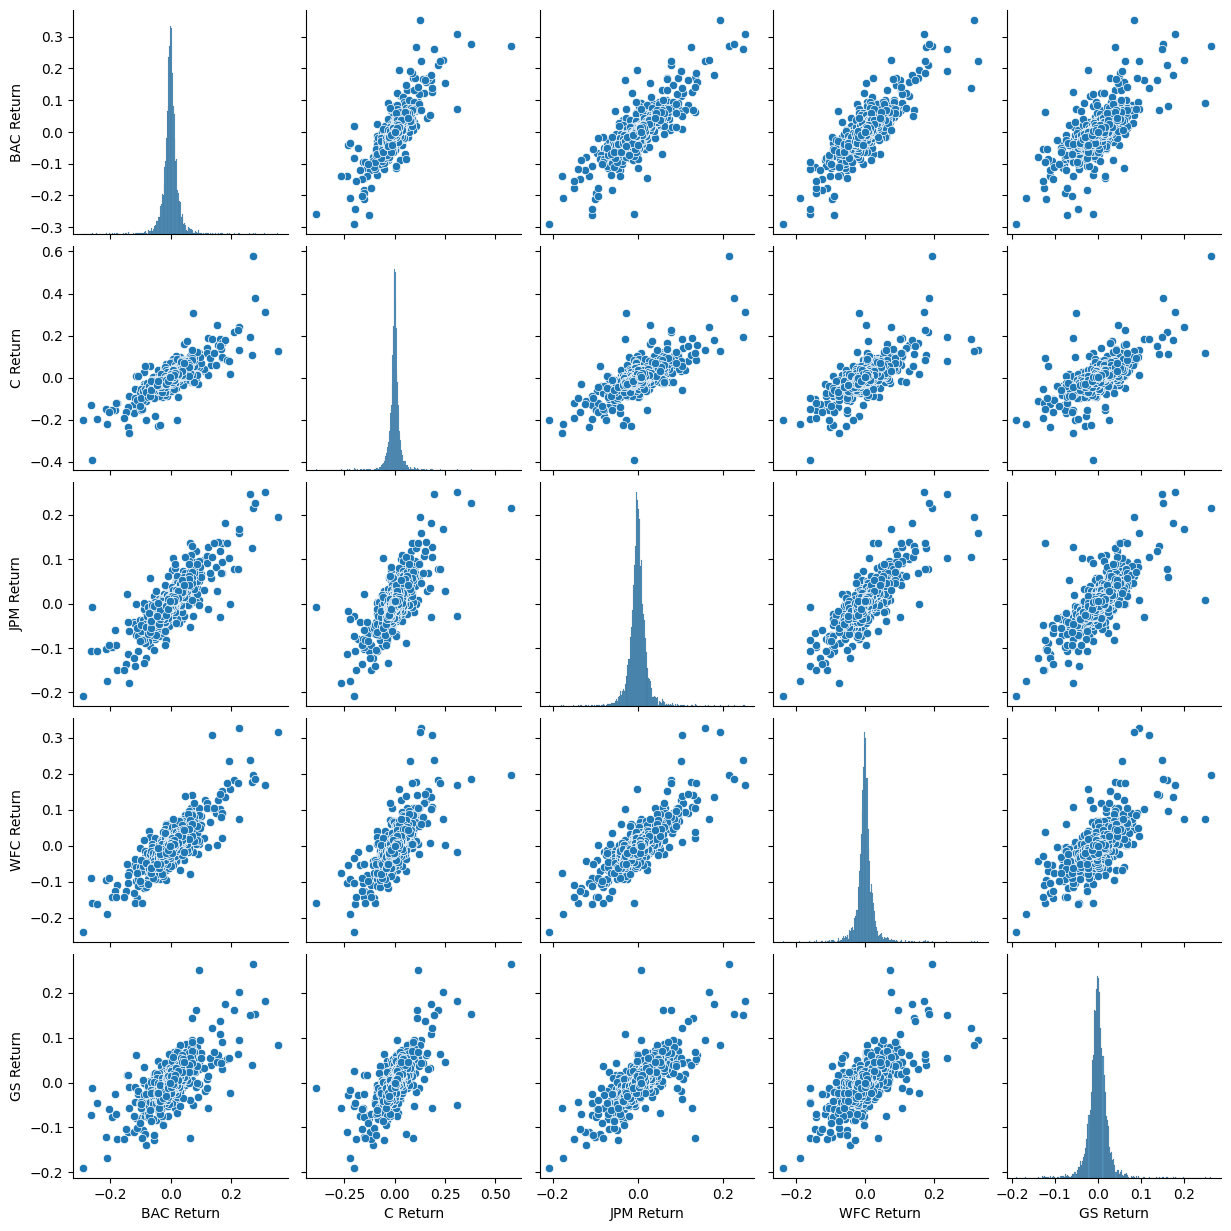

In [38]:
#Data Visualization
import seaborn as sns
sns.pairplot(data=returns[1:])

In [39]:
returns.idxmax()

BAC Return   2009-04-09 00:00:00-04:00
C Return     2008-11-24 00:00:00-05:00
JPM Return   2009-01-21 00:00:00-05:00
WFC Return   2008-07-16 00:00:00-04:00
GS Return    2008-11-24 00:00:00-05:00
dtype: datetime64[ns, America/New_York]

In [40]:
returns.idxmin()

BAC Return   2009-01-20 00:00:00-05:00
C Return     2009-02-27 00:00:00-05:00
JPM Return   2009-01-20 00:00:00-05:00
WFC Return   2009-01-20 00:00:00-05:00
GS Return    2009-01-20 00:00:00-05:00
dtype: datetime64[ns, America/New_York]

In [41]:
#standard deviation
returns.std()

BAC Return    0.031171
C Return      0.032954
JPM Return    0.024309
WFC Return    0.026867
GS Return     0.023078
dtype: float64

In [ ]:
#line plot showing close prise for each bank for the entire time
bank_stocks.head()